# Academic Achievement Survey Results

#### We define significance and set the p-value significance threshold at < .05

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [2]:
df = pd.read_csv('a3.csv')
df.columns = ['Time', 'Year', 'GPA', 'Major','Gender', 'Race', 'Q1','Q2','Q3','Q4','Q5','Q6','Q7']
df.drop(columns = ['Time','Q7'],inplace = True)

In [3]:
def standardize_year(year):
    if '1st' in year:
        return 1
    if '2nd' in year:
        return 2
    if '3rd' in year:
        return 3
    if '4th' in year:
        return 4

In [4]:
def standardize_response(response):
    if 'Strongly Disagree' in response:
        return -2
    if 'Strongly Agree' in response:
        return 2
    if 'Disagree' in response:
        return -1
    if 'Neutral' in response:
        return 0
    if 'Agree' in response:
        return 1

In [5]:
def standardize_gpa(gpa):
    mean = df.drop([49,35]).mean()
    mean = round(mean,1)[0]
    if '8.0' in str(gpa):
        return 3.0
    elif '60' in str(gpa):
        return mean
    else:
        return gpa

In [6]:
def standardize_gpa_hl(gpa):
    if gpa >= 3.5:
        return 'HIGH'
    else:
        return 'LOW'

In [7]:
def standardize_major_stem(string):
    if 'COGSCI' in string:
        return 'STEM'
    if 'COMM' in string:
        return 'NONSTEM'
    if 'ECON' in string:
        return 'NONSTEM'
    if 'ENGINEERING' in string:
        return 'STEM'
    if 'BIO' in string:
        return 'STEM'
    if 'COMPSCI' in string:
        return 'STEM'
    if 'PHYSIOLOGY' in string:
        return 'STEM'
    if 'HEALTH' in string:
        return 'STEM'
    if 'MATH' in string:
        return 'STEM'
    if 'SOCI' in string:
        return 'NONSTEM'
    if 'CHEM' in string:
        return 'STEM'
    if 'BUSINESS' in string:
        return 'NONSTEM'
    if 'PSYCH' in string:
        return 'NONSTEM'
    if 'ANTH' in string:
        return 'NONSTEM'
    if 'JAPANESE' in string:
        return 'NONSTEM'
    if 'POLISCI' in string:
        return 'NONSTEM'

In [8]:
def standardize_major(string):
    string = string.lower()
    string = string.strip() 
    if "cog" in string:
        output = "COGSCI"
    elif "computer" in string:
        output = "COMPSCI"
    elif "econ" in string:
        output = "ECON"
    elif "cs" in string:
        output = 'COMPSCI'
    elif "math" in string:
        output = "MATH"
    elif "engineering" in string:
        output = "ENGINEERING"
    elif "bio" in string:
        output = "BIO"
    elif "chem" in string:
        output = "CHEM"
    elif 'undeclared' in string:
        output = 'UNDECLARED'
    elif 'no' in string:
        output = 'UNDECLARED'
    elif 'anthropological' in string:
        output = 'ANTH'
    elif 'physiology' in string:
        output = 'PHYSIOLOGY'
    elif 'business' in string:
        output = 'BUSINESS'
    elif 'comunication' in string:
        output = 'COMM'
    elif 'comm' in string:
        output = 'COMM'
    elif 'health' in string:
        output = 'HEALTH'
    elif 'glbh' in string:
        output = 'HEALTH'
    elif 'japanese' in string:
        output = 'JAPANESE'
    elif 'political' in string:
        output = 'POLISCI'
    elif 'sociology' in string:
        output = 'SOCI'
    elif 'psychology' in string:
        output = 'PSYCH'
    else:
        output = string
    return output

In [9]:
df['GPA'] = df['GPA'].round(1)
df['GPA'] = df['GPA'].apply(standardize_gpa)
df['Year'] = df['Year'].apply(standardize_year)
df['Major'] = df['Major'].apply(standardize_major)
df['Q1'] = df['Q1'].apply(standardize_response)
df['Q2'] = df['Q2'].apply(standardize_response)
df['Q3'] = df['Q3'].apply(standardize_response)
df['Q4'] = df['Q4'].apply(standardize_response)
df['Q5'] = df['Q5'].apply(standardize_response)

In [10]:
df_gender = df.drop([24,39])
df_gpa = df.dropna()
df_gpa['GPA'] = df_gpa['GPA'].apply(standardize_gpa_hl)
df_stem = df.drop([7,40])
df_stem['Major'] = df_stem['Major'].apply(standardize_major_stem)
df_all = df.drop([7,40,24,39])
df_all['Major'] = df_all['Major'].apply(standardize_major_stem)
df_all['GPA'] = df_all['GPA'].apply(standardize_gpa_hl)

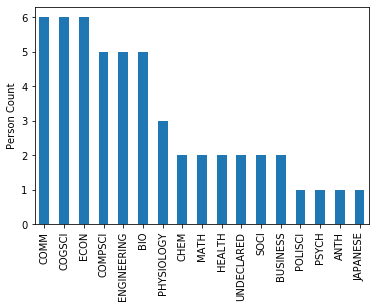

In [11]:
df['Major'].value_counts().plot(kind='bar')
plt.ylabel('Person Count')
plt.show()

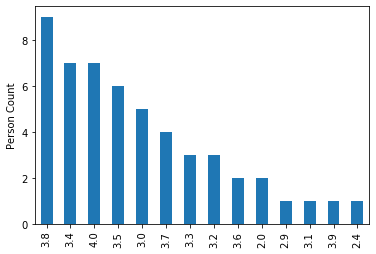

In [12]:
df['GPA'].value_counts().plot(kind='bar')
plt.ylabel('Person Count')
plt.show()

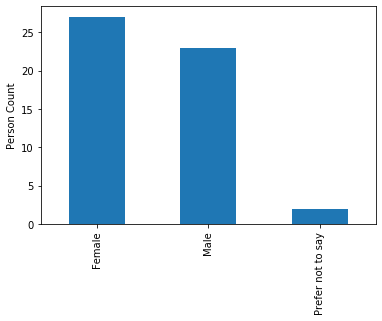

In [13]:
df['Gender'].value_counts().plot(kind='bar')
plt.ylabel('Person Count')
plt.show()

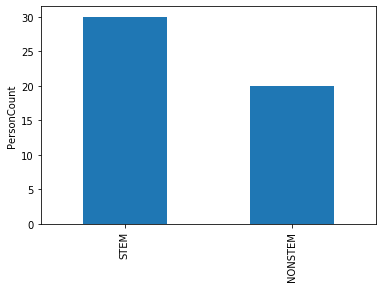

In [14]:
df_stem['Major'].value_counts().plot(kind='bar')
plt.ylabel('PersonCount')
plt.show()

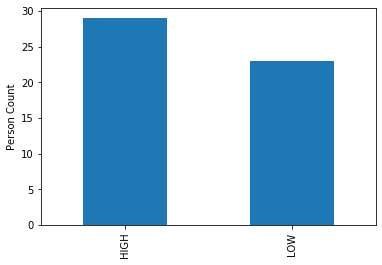

In [15]:
df_gpa['GPA'].value_counts().plot(kind='bar')
plt.ylabel('Person Count')
plt.show()

In [16]:
print('Median GPA is: ',df['GPA'].median())
print('Average GPA is: ',df['GPA'].mean())

Median GPA is:  3.5
Average GPA is:  3.457692307692308


In [17]:
print('STEM average GPA: ',df_stem[df_stem['Major'] == 'STEM'].GPA.mean())
print('NON-STEM average GPA: ',df_stem[df_stem['Major'] == 'NONSTEM'].GPA.mean())

STEM average GPA:  3.4566666666666666
NON-STEM average GPA:  3.5050000000000003


## Q1: "It is more important to spend more time focusing on attaining a High-Grade Point Average than focusing on building relationships"

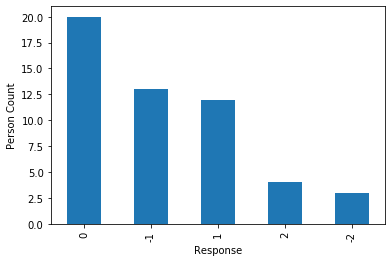

In [18]:
df['Q1'].value_counts().plot(kind='bar')
plt.xlabel("Response")
plt.ylabel("Person Count")
plt.show()

In [19]:
print('Average for people with GPA 3.5 or above: ',df[df['GPA'] >= 3.5]['Q1'].mean())
print('Average for people with GPA below 3.5 ',df[df['GPA'] < 3.5]['Q1'].mean())
print('On average, people with higher GPAs prefer to prioritize their GPA')

Average for people with GPA 3.5 or above:  0.13793103448275862
Average for people with GPA below 3.5  -0.13043478260869565
On average, people with higher GPAs prefer to prioritize their GPA


###### Hypothesis: People with higher GPAs prefer to prioritize GPA than to prioritize building relationships more than people with lower GPAs

In [20]:
print('Average response for Males: ',df[df['Gender'] == 'Male']['Q1'].mean())
print('Average response for Females: ',df[df['Gender'] == 'Female']['Q1'].mean())
print('On average, females prefer to prioritize relationship building')

Average response for Males:  0.043478260869565216
Average response for Females:  -0.07407407407407407
On average, females prefer to prioritize relationship building


###### Hypothesis: Females prefer to prioritize building relationships than to prioritize their GPAs more than males

In [21]:
print('Average response for STEM majors: ',df_stem[df_stem['Major'] == 'STEM']['Q1'].mean())
print('Average response for NON-STEM majors: ',df_stem[df_stem['Major'] == 'NONSTEM']['Q1'].mean())
print('On average, STEM majors prefer to prioritize relationship building')

Average response for STEM majors:  -0.13333333333333333
Average response for NON-STEM majors:  0.15
On average, STEM majors prefer to prioritize relationship building


###### Hypothesis: STEM majors prefer to prioritize building relationships than to prioritize their GPAs more than non-STEM majors

In [22]:
outcome, predictors = patsy.dmatrices('Q1 ~ GPA',df)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Q1   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                   0.08067
Date:                Mon, 09 Mar 2020   Prob (F-statistic):              0.778
Time:                        01:55:08   Log-Likelihood:                -74.229
No. Observations:                  52   AIC:                             152.5
Df Residuals:                      50   BIC:                             156.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3274      1.094      0.299      0.766      -1.870       2.525
GPA           -0.0891      0.314     -0.284      0.778      -0.719       0.541
==============================================================================
Omnibus:                        0.339   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.516
Skew:                           0.087   Prob(JB):                        0.773
Kurtosis:                       2.544   Cond. No.                         28.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
outcome, predictors = patsy.dmatrices('Q1 ~ Gender',df_gender)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Q1   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.1688
Date:                Mon, 09 Mar 2020   Prob (F-statistic):              0.683
Time:                        01:55:08   Log-Likelihood:                -70.344
No. Observations:                  50   AIC:                             144.7
Df Residuals:                      48   BIC:                             148.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0741      0.194     -0.382      0.704      -0.464       0.316
Gender[T.Male]     0.1176      0.286      0.411      0.683      -0.458       0.693
==============================================================================
Omnibus:                        0.405   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.558
Skew:                           0.036   Prob(JB):                        0.757
Kurtosis:                       2.488   Cond. No.                         2.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
outcome, predictors = patsy.dmatrices('Q1 ~ Major',df_stem)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Q1   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9630
Date:                Mon, 09 Mar 2020   Prob (F-statistic):              0.331
Time:                        01:55:08   Log-Likelihood:                -69.935
No. Observations:                  50   AIC:                             143.9
Df Residuals:                      48   BIC:                             147.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1500      0.224      0.671      0.506      -0.300       0.600
Major[T.STEM]    -0.2833      0.289     -0.981      0.331      -0.864       0.297
==============================================================================
Omnibus:                        0.076   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.963   Jarque-Bera (JB):                0.259
Skew:                          -0.056   Prob(JB):                        0.879
Kurtosis:                       2.666   Cond. No.                         2.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
outcome, predictors = patsy.dmatrices('Q1 ~ GPA + Major + Gender',df_all)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Q1   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                    0.5948
Date:                Mon, 09 Mar 2020   Prob (F-statistic):              0.622
Time:                        01:55:08   Log-Likelihood:                -65.506
No. Observations:                  48   AIC:                             139.0
Df Residuals:                      44   BIC:                             146.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1802      0.271      0.666      0.509      -0.365       0.726
GPA[T.LOW]        -0.1324      0.297     -0.445      0.658      -0.731       0.466
Major[T.STEM]     -0.3547      0.290     -1.221      0.229      -0.940       0.231
Gender[T.Male]     0.0505      0.297      0.170      0.866      -0.547       0.648
==============================================================================
Omnibus:                        0.379   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.827   Jarque-Bera (JB):                0.540
Skew:                          -0.158   Prob(JB):                        0.763
Kurtosis:                       2.587   Cond. No.                         3.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Overall, you can see that from the data, the best predictor for the question that asks whether GPA is more important than relationships, is major when compared to GPA and gender. The p-values do not support any of the hypotheses, though.

## Q2: "It is more important to attend every single lecture rather than just reading off the slides from canvas and watching the podcasts"

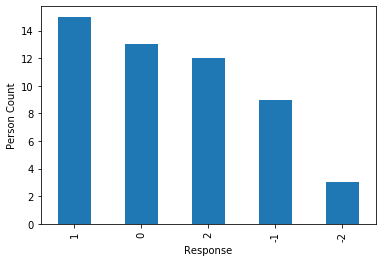

In [26]:
df['Q2'].value_counts().plot(kind='bar')
plt.xlabel("Response")
plt.ylabel("Person Count")
plt.show()

In [27]:
print('Average for people with GPA 3.5 or above: ',df[df['GPA'] >= 3.5]['Q2'].mean())
print('Average for people with GPA below 3.5 ',df[df['GPA'] < 3.5]['Q2'].mean())
print('On average, people with higher GPAs prefer to attend lecture')

Average for people with GPA 3.5 or above:  0.8275862068965517
Average for people with GPA below 3.5  0.0
On average, people with higher GPAs prefer to attend lecture


###### Hypothesis: People with higher GPAs prefer to attend lecture

In [28]:
print('Average for Males: ',df[df['Gender'] == 'Male']['Q2'].mean())
print('Average for Females majors: ',df[df['Gender'] == 'Female']['Q2'].mean())
print('On average, females prefer to attend lecture')

Average for Males:  0.21739130434782608
Average for Females majors:  0.5555555555555556
On average, females prefer to attend lecture


###### Hypothesis: Females prefer to attend lecture

In [29]:
print('Average for STEM majors: ',df_stem[df_stem['Major'] == 'STEM']['Q2'].mean())
print('Average for NON-STEM majors: ',df_stem[df_stem['Major'] == 'NONSTEM']['Q2'].mean())
print('On average, NON-STEM majors prefer to attend lecture')

Average for STEM majors:  0.06666666666666667
Average for NON-STEM majors:  1.0
On average, NON-STEM majors prefer to attend lecture


###### Hypothesis: People that are non-STEM majors prefer to attend lecture

In [30]:
outcome, predictors = patsy.dmatrices('Q2 ~ GPA',df)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Q2   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     4.712
Date:                Mon, 09 Mar 2020   Prob (F-statistic):             0.0347
Time:                        01:55:08   Log-Likelihood:                -80.236
No. Observations:                  52   AIC:                             164.5
Df Residuals:                      50   BIC:                             168.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1817      1.228     -1.776      0.082      -4.649       0.285
GPA            0.7644      0.352      2.171      0.035       0.057       1.472
==============================================================================
Omnibus:                        3.153   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.207   Jarque-Bera (JB):                2.872
Skew:                          -0.496   Prob(JB):                        0.238
Kurtosis:                       2.416   Cond. No.                         28.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
outcome, predictors = patsy.dmatrices('Q2 ~ Gender',df_gender)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Q2   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.024
Date:                Mon, 09 Mar 2020   Prob (F-statistic):              0.317
Time:                        01:55:09   Log-Likelihood:                -78.106
No. Observations:                  50   AIC:                             160.2
Df Residuals:                      48   BIC:                             164.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5556      0.227      2.451      0.018       0.100       1.011
Gender[T.Male]    -0.3382      0.334     -1.012      0.317      -1.010       0.334
==============================================================================
Omnibus:                        4.406   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                2.211
Skew:                          -0.226   Prob(JB):                        0.331
Kurtosis:                       2.075   Cond. No.                         2.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
outcome, predictors = patsy.dmatrices('Q2 ~ Major', df_stem)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Q2   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     8.381
Date:                Mon, 09 Mar 2020   Prob (F-statistic):            0.00569
Time:                        01:55:09   Log-Likelihood:                -75.449
No. Observations:                  50   AIC:                             154.9
Df Residuals:                      48   BIC:                             158.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.0000      0.250      4.004      0.000       0.498       1.502
Major[T.STEM]    -0.9333      0.322     -2.895      0.006      -1.582      -0.285
==============================================================================
Omnibus:                        2.744   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.254   Jarque-Bera (JB):                1.549
Skew:                          -0.104   Prob(JB):                        0.461
Kurtosis:                       2.163   Cond. No.                         2.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
outcome, predictors = patsy.dmatrices('Q2 ~ GPA + Major + Gender',df_all)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Q2   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     7.047
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           0.000571
Time:                        01:55:09   Log-Likelihood:                -66.061
No. Observations:                  48   AIC:                             140.1
Df Residuals:                      44   BIC:                             147.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.4026      0.274      5.122      0.000       0.851       1.954
GPA[T.LOW]        -0.7071      0.301     -2.352      0.023      -1.313      -0.101
Major[T.STEM]     -1.0317      0.294     -3.511      0.001      -1.624      -0.440
Gender[T.Male]    -0.2662      0.300     -0.887      0.380      -0.871       0.339
==============================================================================
Omnibus:                        1.593   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.184
Skew:                          -0.129   Prob(JB):                        0.553
Kurtosis:                       2.275   Cond. No.                         3.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Overall, you can see that from the data, both GPA and major support the hypothesis that people with higher GPAs tend to prefer attending lecture and people that are NON-STEM majors tend to prefer attending lecture, and this is supported by the p-values, but it does not support the hypothesis that gender influences attendance preference.

## Q3: "Not seeking support from classmates will cause you to perform poorly in a course"

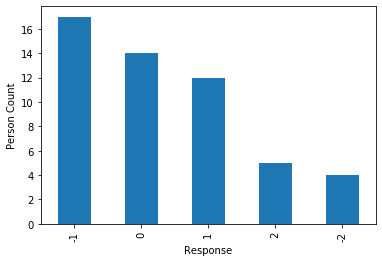

In [34]:
df['Q3'].value_counts().plot(kind='bar')
plt.xlabel("Response")
plt.ylabel("Person Count")
plt.show()

In [35]:
print('Average for people with GPA 3.5 or above: ',df[df['GPA'] >= 3.5]['Q3'].mean())
print('Average for people with GPA below 3.5 ',df[df['GPA'] < 3.5]['Q3'].mean())
print('On average, people with lower GPAs dont think that classmate support causes '+
      'you to perform poorly in the class')

Average for people with GPA 3.5 or above:  0.034482758620689655
Average for people with GPA below 3.5  -0.17391304347826086
On average, people with lower GPAs dont think that classmate support causes you to perform poorly in the class


###### Hypothesis: people with lower GPAs dont value support from classmates compared to higher GPAs

In [36]:
print('Average for Males: ',df[df['Gender'] == 'Male']['Q3'].mean())
print('Average for Females majors: ',df[df['Gender'] == 'Female']['Q3'].mean())
print('On average, females dont think classmate support causes you to perform poorly in a course')

Average for Males:  0.0
Average for Females majors:  -0.037037037037037035
On average, females dont think classmate support causes you to perform poorly in a course


###### Hypothesis: females dont value support from classmates compared to males

In [37]:
print('Average for STEM majors: ',df_stem[df_stem['Major'] == 'STEM']['Q3'].mean())
print('Average for NON-STEM majors: ',df_stem[df_stem['Major'] == 'NONSTEM']['Q3'].mean())
print('On average, STEM majors dont think classmate support is important to not perform poorly')

Average for STEM majors:  -0.2
Average for NON-STEM majors:  0.05
On average, STEM majors dont think classmate support is important to not perform poorly


###### Hypothesis: STEM majors tend to not value support from classmates for performance in a course more than NON-STEM majors

In [38]:
outcome, predictors = patsy.dmatrices('Q3 ~ GPA',df)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Q3   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.7809
Date:                Mon, 09 Mar 2020   Prob (F-statistic):              0.381
Time:                        01:55:09   Log-Likelihood:                -79.114
No. Observations:                  52   AIC:                             162.2
Df Residuals:                      50   BIC:                             166.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1108      1.202     -0.924      0.360      -3.525       1.303
GPA            0.3046      0.345      0.884      0.381      -0.388       0.997
==============================================================================
Omnibus:                        2.239   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.326   Jarque-Bera (JB):                1.458
Skew:                           0.143   Prob(JB):                        0.482
Kurtosis:                       2.231   Cond. No.                         28.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
outcome, predictors = patsy.dmatrices('Q3 ~ Gender',df_gender)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Q3   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                   0.01341
Date:                Mon, 09 Mar 2020   Prob (F-statistic):              0.908
Time:                        01:55:09   Log-Likelihood:                -75.903
No. Observations:                  50   AIC:                             155.8
Df Residuals:                      48   BIC:                             159.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0370      0.217     -0.171      0.865      -0.473       0.399
Gender[T.Male]     0.0370      0.320      0.116      0.908      -0.606       0.680
==============================================================================
Omnibus:                        3.573   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.168   Jarque-Bera (JB):                1.965
Skew:                           0.211   Prob(JB):                        0.374
Kurtosis:                       2.125   Cond. No.                         2.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
outcome, predictors = patsy.dmatrices('Q3 ~ Major',df_stem)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Q3   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.6025
Date:                Mon, 09 Mar 2020   Prob (F-statistic):              0.441
Time:                        01:55:09   Log-Likelihood:                -75.401
No. Observations:                  50   AIC:                             154.8
Df Residuals:                      48   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0500      0.249      0.200      0.842      -0.452       0.552
Major[T.STEM]    -0.2500      0.322     -0.776      0.441      -0.898       0.398
==============================================================================
Omnibus:                        3.075   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                2.012
Skew:                           0.281   Prob(JB):                        0.366
Kurtosis:                       2.194   Cond. No.                         2.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
outcome, predictors = patsy.dmatrices('Q3 ~ GPA + Major + Gender',df_all)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Q3   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.059
Method:                 Least Squares   F-statistic:                    0.1281
Date:                Mon, 09 Mar 2020   Prob (F-statistic):              0.943
Time:                        01:55:09   Log-Likelihood:                -71.946
No. Observations:                  48   AIC:                             151.9
Df Residuals:                      44   BIC:                             159.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0877      0.310      0.283      0.778      -0.536       0.712
GPA[T.LOW]        -0.0331      0.340     -0.097      0.923      -0.718       0.652
Major[T.STEM]     -0.1919      0.332     -0.578      0.566      -0.861       0.478
Gender[T.Male]    -0.0544      0.339     -0.160      0.873      -0.738       0.629
==============================================================================
Omnibus:                        3.128   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.209   Jarque-Bera (JB):                2.037
Skew:                           0.294   Prob(JB):                        0.361
Kurtosis:                       2.180   Cond. No.                         3.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Overall, you can see that from the data, that none of the hypotheses are supported for this question that asks if classmate support is important for performance on a course based on the p-values, but the best predictor tends to be major, either STEM or non-STEM when compared to the rest

## Q4: "Consulting outside sources to re-study topics about course material is more important than relying on resources provided by the class itself"

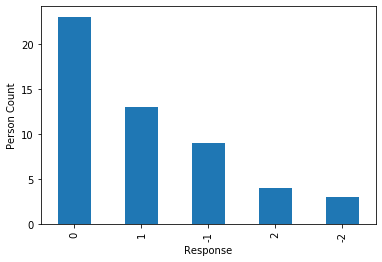

In [42]:
df['Q4'].value_counts().plot(kind='bar')
plt.xlabel("Response")
plt.ylabel("Person Count")
plt.show()

In [43]:
print('Average for people with GPA 3.5 or above: ',df[df['GPA'] >= 3.5]['Q4'].mean())
print('Average for people with GPA below 3.5 ',df[df['GPA'] < 3.5]['Q4'].mean())
print('On average, people with higher GPAs think that outside resources are more important than class resources')

Average for people with GPA 3.5 or above:  0.3103448275862069
Average for people with GPA below 3.5  -0.13043478260869565
On average, people with higher GPAs think that outside resources are more important than class resources


###### Hypothesis: People with higher GPAs try to not rely on just class resources when compared to people with lower GPAs

In [44]:
print('Average for Males: ',df[df['Gender'] == 'Male']['Q4'].mean())
print('Average for Females majors: ',df[df['Gender'] == 'Female']['Q4'].mean())
print('On average, males believe that outside resources are more important than class resources')

Average for Males:  0.43478260869565216
Average for Females majors:  -0.14814814814814814
On average, males believe that outside resources are more important than class resources


###### Hypothesis: Males tend to consult more outside resources rather than sticking to class resources when compared to females

In [45]:
print('Average for STEM majors: ',df_stem[df_stem['Major'] == 'STEM']['Q4'].mean())
print('Average for NON-STEM majors: ',df_stem[df_stem['Major'] == 'NONSTEM']['Q4'].mean())
print('On average, STEM majors dont think classmate support is important to not perform poorly')

Average for STEM majors:  0.13333333333333333
Average for NON-STEM majors:  0.1
On average, STEM majors dont think classmate support is important to not perform poorly


###### Hypothesis: STEM majors tend to consult more outside resources rather than sticking to class resources when compared to non-STEM majors

In [46]:
outcome, predictors = patsy.dmatrices('Q4 ~ GPA',df)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Q4   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8371
Date:                Mon, 09 Mar 2020   Prob (F-statistic):              0.365
Time:                        01:55:09   Log-Likelihood:                -71.971
No. Observations:                  52   AIC:                             147.9
Df Residuals:                      50   BIC:                             151.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8350      1.048     -0.797      0.429      -2.939       1.269
GPA            0.2749      0.300      0.915      0.365      -0.329       0.878
==============================================================================
Omnibus:                        0.293   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.339
Skew:                          -0.166   Prob(JB):                        0.844
Kurtosis:                       2.785   Cond. No.                         28.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
outcome, predictors = patsy.dmatrices('Q4 ~ Gender',df_gender)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Q4   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     5.466
Date:                Mon, 09 Mar 2020   Prob (F-statistic):             0.0236
Time:                        01:55:09   Log-Likelihood:                -63.460
No. Observations:                  50   AIC:                             130.9
Df Residuals:                      48   BIC:                             134.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.1481      0.169     -0.876      0.385      -0.488       0.192
Gender[T.Male]     0.5829      0.249      2.338      0.024       0.082       1.084
==============================================================================
Omnibus:                        0.119   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.942   Jarque-Bera (JB):                0.098
Skew:                           0.088   Prob(JB):                        0.952
Kurtosis:                       2.872   Cond. No.                         2.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
outcome, predictors = patsy.dmatrices('Q4 ~ Major',df_stem)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Q4   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                   0.01299
Date:                Mon, 09 Mar 2020   Prob (F-statistic):              0.910
Time:                        01:55:09   Log-Likelihood:                -70.578
No. Observations:                  50   AIC:                             145.2
Df Residuals:                      48   BIC:                             149.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1000      0.227      0.441      0.661      -0.355       0.555
Major[T.STEM]     0.0333      0.292      0.114      0.910      -0.555       0.621
==============================================================================
Omnibus:                        0.173   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.917   Jarque-Bera (JB):                0.289
Skew:                          -0.127   Prob(JB):                        0.865
Kurtosis:                       2.728   Cond. No.                         2.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
outcome, predictors = patsy.dmatrices('Q4 ~ GPA + Major + Gender',df_all)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Q4   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     3.152
Date:                Mon, 09 Mar 2020   Prob (F-statistic):             0.0342
Time:                        01:55:09   Log-Likelihood:                -59.799
No. Observations:                  48   AIC:                             127.6
Df Residuals:                      44   BIC:                             135.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0385      0.240     -0.160      0.874      -0.523       0.446
GPA[T.LOW]        -0.4895      0.264     -1.855      0.070      -1.021       0.042
Major[T.STEM]      0.0902      0.258      0.350      0.728      -0.430       0.610
Gender[T.Male]     0.7428      0.263      2.821      0.007       0.212       1.274
==============================================================================
Omnibus:                        0.780   Durbin-Watson:                   1.550
Prob(Omnibus):                  0.677   Jarque-Bera (JB):                0.861
Skew:                           0.198   Prob(JB):                        0.650
Kurtosis:                       2.477   Cond. No.                         3.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Overall, you can see that from the data, that the hypotheses are not supported except for the one saying gender is an accurate predictor of whether or not one values outside resource consultation more than in class resources, this is supported by our p-value calculations, whereas major and GPA are not good predictors for this question

## Q5: "Strictly focusing on attaining a high Grade Point average more than anything else could hurt your relationships with others"

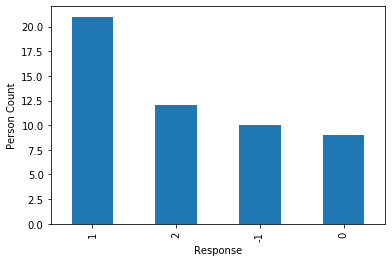

In [50]:
df['Q5'].value_counts().plot(kind='bar')
plt.xlabel("Response")
plt.ylabel("Person Count")
plt.show()

In [51]:
print('Average for people with GPA 3.5 or above: ',df[df['GPA'] >= 3.5]['Q5'].mean())
print('Average for people with GPA below 3.5 ',df[df['GPA'] < 3.5]['Q5'].mean())
print('On average, people with lower GPAs believe that focusing on GPA could hurt relations with others')

Average for people with GPA 3.5 or above:  0.6206896551724138
Average for people with GPA below 3.5  0.7391304347826086
On average, people with lower GPAs believe that focusing on GPA could hurt relations with others


###### Hypothesis: People with lower GPAs believe that strictly focusing on GPA could hurt your relationships when compared with people with higher GPAs

In [52]:
print('Average for Males: ',df[df['Gender'] == 'Male']['Q5'].mean())
print('Average for Females majors: ',df[df['Gender'] == 'Female']['Q5'].mean())
print('On average, males believe that focusing on GPA could hurt relations with others')

Average for Males:  0.6956521739130435
Average for Females majors:  0.6296296296296297
On average, males believe that focusing on GPA could hurt relations with others


###### Hypothesis: Males believe that strictly focusing on GPA could hurt your relationships when compared with females

In [53]:
print('Average for STEM majors: ',df_stem[df_stem['Major'] == 'STEM']['Q5'].mean())
print('Average for NON-STEM majors: ',df_stem[df_stem['Major'] == 'NONSTEM']['Q5'].mean())
print('On average, STEM majors believe that focusing on GPA could hurt relations with others')

Average for STEM majors:  0.7666666666666667
Average for NON-STEM majors:  0.55
On average, STEM majors believe that focusing on GPA could hurt relations with others


###### Hypothesis: STEM majors believe that strictly focusing on GPA could hurt your relationships when compared with non-STEM majors

In [54]:
outcome, predictors = patsy.dmatrices('Q5 ~ GPA',df)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Q5   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.061
Date:                Mon, 09 Mar 2020   Prob (F-statistic):              0.308
Time:                        01:55:10   Log-Likelihood:                -74.905
No. Observations:                  52   AIC:                             153.8
Df Residuals:                      50   BIC:                             157.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8053      1.109      1.629      0.110      -0.421       4.032
GPA           -0.3275      0.318     -1.030      0.308      -0.966       0.311
==============================================================================
Omnibus:                        6.236   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.807
Skew:                          -0.280   Prob(JB):                        0.246
Kurtosis:                       2.009   Cond. No.                         28.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
outcome, predictors = patsy.dmatrices('Q5 ~ Gender',df_gender)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Q5   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.04888
Date:                Mon, 09 Mar 2020   Prob (F-statistic):              0.826
Time:                        01:55:10   Log-Likelihood:                -72.482
No. Observations:                  50   AIC:                             149.0
Df Residuals:                      48   BIC:                             152.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6296      0.203      3.109      0.003       0.222       1.037
Gender[T.Male]     0.0660      0.299      0.221      0.826      -0.534       0.666
==============================================================================
Omnibus:                        6.500   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                3.172
Skew:                          -0.366   Prob(JB):                        0.205
Kurtosis:                       2.006   Cond. No.                         2.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
outcome, predictors = patsy.dmatrices('Q5 ~ Major',df_stem)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Q5   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.4978
Date:                Mon, 09 Mar 2020   Prob (F-statistic):              0.484
Time:                        01:55:10   Log-Likelihood:                -73.017
No. Observations:                  50   AIC:                             150.0
Df Residuals:                      48   BIC:                             153.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5500      0.238      2.312      0.025       0.072       1.028
Major[T.STEM]     0.2167      0.307      0.706      0.484      -0.401       0.834
==============================================================================
Omnibus:                        6.277   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                3.253
Skew:                          -0.391   Prob(JB):                        0.197
Kurtosis:                       2.026   Cond. No.                         2.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
outcome, predictors = patsy.dmatrices('Q5 ~ GPA + Major + Gender',df_all)
mod = sm.OLS(outcome,predictors)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Q5   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                    0.2235
Date:                Mon, 09 Mar 2020   Prob (F-statistic):              0.880
Time:                        01:55:10   Log-Likelihood:                -69.973
No. Observations:                  48   AIC:                             147.9
Df Residuals:                      44   BIC:                             155.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4679      0.297      1.575      0.122      -0.131       1.067
GPA[T.LOW]         0.1442      0.326      0.442      0.661      -0.513       0.801
Major[T.STEM]      0.1919      0.319      0.602      0.550      -0.451       0.834
Gender[T.Male]     0.0544      0.326      0.167      0.868      -0.602       0.710
==============================================================================
Omnibus:                        5.329   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                2.814
Skew:                          -0.352   Prob(JB):                        0.245
Kurtosis:                       2.046   Cond. No.                         3.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Overall, you can see that from the data, the best predictor for the question that asks whether focusing on GPA could hurt your relationships with others, is major when compared to GPA and gender. The p-values do not support any of the hypotheses, though.